 ### ------------------------Start of Assignment------------------------------
 #### Title:Module 2 / Week 8: Random Advanced Validation
  <li> DATA SCIENCE  Advance Validation
  <li> Name:RAJESH ASHOK JAISWAL UIN:669012329
  <li> DATED:10/17/2016
### ----------------------------------------------------------------------------

## -I have answered all the three point in this python notebook

In [2]:
##in this section will import all required imports
##Such a RandomForestClassifier and other measuring parameter of accuracy

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### ---------------------Storing Breast Cancer csv data in local data frame---------------
##### Local Data frame Name: 'Rdata'

In [3]:
## Rdata new local dataframe in which we are loading breast cancer csv data
Rdata = pd.read_csv("breast_cancer.csv")

In [4]:
## Will check name of columns
Rdata.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
## here we will check shape of Rdata file (Number of entries(Rows),Number of columns)

Rdata.shape

(699, 12)

In [6]:
Rdata.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
count,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413,0.344778
std,201.928205,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078,0.475636
min,0.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000
25%,174.500000,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,349.000000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,523.500000,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,698.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## -------------- Cleaning and Missing Value handling---------------
<li> Dropping Nonrequired Columns
<li> Cleaning Data or Handling Missing Data
<li> Renaming Column names for easy handling of data


#### -------In this step will drop non-required columns-------------------

In [7]:
#Will remove not required columns such as 'Unnamed: 0' and 'id number' as we are predicting probabilty of cancer cell is malignant or not
Rdata = Rdata.drop(['Unnamed: 0', 'id number'], axis=1)

In [8]:
#Here will display Rdata after removal of non-required columns 
Rdata.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [9]:
#Will again check shape of Rdata after removal of non-required columns
Rdata.shape

(699, 10)

## --------------------------------In this Step will do Rename of columns----------------

In [10]:
#In this section will check is there any missing values in each column 
#before checking missing values rename column names to precise name
Rdata.rename(columns={'clump_thickness':'Clmpthk'}, inplace=True)
Rdata.rename(columns={'uniformity_of_cell_size':'Ucelsz'}, inplace=True)
Rdata.rename(columns={'uniformity_of_cell_shape':'Ucelsp'}, inplace=True)
Rdata.rename(columns={'marginal_adhesion':'Mgradh'}, inplace=True)
Rdata.rename(columns={'epithelial_cell_size':'Ecelsz'}, inplace=True)
Rdata.rename(columns={'bare_nuclei':'Brnuc'}, inplace=True)
Rdata.rename(columns={'bland_chromatin':'Bldchr'}, inplace=True)
Rdata.rename(columns={'normal_nucleoli':'Nrmnuc'}, inplace=True)
Rdata.rename(columns={'mitoses':'Mit'}, inplace=True)
Rdata.rename(columns={'malignant':'Malignant'}, inplace=True)

In [11]:
## Will check column name after renaming it
Rdata.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


### ----------------------Will handle missing data---------------------------------------- 

In [12]:
Rdata[Rdata.Clmpthk.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [13]:
Rdata[Rdata.Ucelsz.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [14]:
Rdata[Rdata.Ucelsp.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [15]:
Rdata[Rdata.Mgradh.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [16]:
Rdata[Rdata.Ecelsz.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [17]:
Rdata[Rdata.Brnuc.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [18]:
Rdata[Rdata.Bldchr.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [19]:
Rdata[Rdata.Nrmnuc.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [20]:
Rdata[Rdata.Mit.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


In [21]:
Rdata[Rdata.Malignant.isnull()]

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant


#### -----------------output show's now missing data----------------------
#### -----------------will move toward algorithm now

## ------------In this part will apply Random forest algorithm----------------
<li> First Divide Breast data such way that we can use for below method
<li> Single hold out Method
<li> k(10)-fold-Cross Validation Method


### ------------------Division of data for further action--------------------

In [22]:
## Will duplicate 'Rdata' dataframe  into two new data frame

## For single holdout will use 'SHdata' data Frame

SHData=Rdata

In [23]:
SHData.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [24]:
## For Cross Validation will us 'CVdata' data Frame
CVdata=Rdata

In [25]:
CVdata.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## -------------------------Single hold out Method--------------------------
### ----------------------Will split Data into Train, Test, Validation----------------------------

We are splitting our data into three sets   

Train = 60% for training

Validation = 20% for model tuning

Test = 20% for actual model testing.  

**Pros:**  This keeps overfitting to our test set under control.   

**Cons:** Our training data keeps getting smaller.   

Good method for very large N, but here we have a smaller N.

In [26]:
## Will create three splits of local dataFrame 'SHData' created for this menthod
SHtrain, SHvalid, SHtest = np.split(SHData.sample(frac=1), [int(.6*len(SHData)), int(.8*len(SHData))])

In [27]:
##Shape of each dataset
SHtrain.shape

(419, 10)

In [28]:
SHvalid.shape

(140, 10)

In [29]:
SHtest.shape

(140, 10)

#### ------------------Will Now Assign X and Y values of all three dataset----------
<li> For SHtrain  (X_SHtrain,Y_SHtrain)
<li> For SHvalid  (X_SHvalid,Y_SHvalid)
<li> For SHtest   (X_SHtest,Y_SHtest)

In [30]:
Y_SHtrain=SHtrain.pop('Malignant')

In [31]:
X_SHtrain=SHtrain

In [32]:
Y_SHvalid=SHvalid.pop('Malignant')

In [33]:
X_SHvalid=SHvalid

In [34]:
Y_SHtest=SHtest.pop('Malignant')

In [35]:
X_SHtest=SHtest

### -----------------------Grid Search! For Single Hold out Method---------------
<li>Will add more parameter as shown in video

In [36]:
### Grid Search
n_estimators = [50,100,300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [37]:
estimator.fit(X_SHtrain, Y_SHtrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [50, 100, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
best_rfc = estimator.best_estimator_

## -----------------------Accuracy Check(AUC)-----------------------------
### ----------------------In this section will check accuracy------------------
<li> For 20 %test Dataset 
<li> For 20 %Valid Dataset 

In [41]:
## accuracyt for 20% testdataset
accuracyt = accuracy_score(Y_SHtest, best_rfc.predict(X_SHtest))
print "Accuracy: ", accuracyt

Accuracy:  0.971428571429


In [42]:
## accuracyv for 20% Validdataset
accuracyv = accuracy_score(Y_SHvalid, best_rfc.predict(X_SHvalid))
print "Accuracy: ", accuracyv

Accuracy:  0.95


### So such way accuracy for 20 % test dataset is 97% and for 20 % validation dataset is 95%

In [43]:
## for test dataset
y_hatt = best_rfc.predict(X_SHtest)

In [44]:
##for validation dataset 
y_hatv = best_rfc.predict(X_SHvalid)

In [45]:
y_hatt

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1])

In [46]:
y_hatv

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0])

In [48]:
Y_SHtest

660    0
554    0
447    0
571    1
196    0
208    0
688    0
653    0
478    0
116    0
36     1
11     0
377    0
124    1
364    0
464    0
399    0
347    0
417    0
451    0
111    1
423    0
242    0
138    0
440    1
197    0
315    0
648    1
507    0
376    0
      ..
37     0
374    0
519    1
433    0
218    1
469    0
383    0
363    0
165    0
38     1
84     1
282    1
494    0
524    0
98     1
689    0
592    1
548    0
28     0
431    0
172    0
354    0
94     0
251    1
576    0
71     1
30     0
367    1
365    0
149    1
Name: Malignant, dtype: int64

In [49]:
Y_SHvalid

4      0
236    1
461    0
292    1
370    0
362    0
583    0
51     1
419    0
285    1
49     1
665    0
263    1
295    1
557    0
302    1
678    0
623    0
259    0
522    1
272    1
641    0
21     1
244    0
595    0
90     0
535    0
679    0
663    0
67     1
      ..
120    0
446    0
52     1
137    0
392    0
5      1
323    1
104    1
212    0
378    0
649    0
441    0
334    1
386    1
235    0
62     1
336    1
429    0
391    1
453    1
40     0
351    0
435    1
521    0
388    0
349    1
652    0
186    1
299    1
624    0
Name: Malignant, dtype: int64

In [51]:
## for test dataset
correctt = 0
totalt = Y_SHtest.shape[0]
for pred_val, truth_val in zip(y_hatt, Y_SHtest):
    if pred_val == truth_val:
        correctt +=1

print correctt / float(totalt)

0.971428571429


In [53]:
## for Validation dataset
correctv = 0
totalv = Y_SHvalid.shape[0]
for pred_val, truth_val in zip(y_hatv, Y_SHvalid):
    if pred_val == truth_val:
        correctv +=1

print correctv / float(totalv)

0.95


## ---------------------Precision and Recall for Single hold out method-----------

Precision:   The model will correctly identify 97% and 95% for cancer maligant testing for test and validation datset simaltenously.   Conversely there is a 3% and 5% chance it will identify a non-prediction.  (tp / tp+fp)

Recall:  Of the people the model identified as winners, 97% and 95% of will be correct accuracy.  (tp / tp + fn)

In [54]:
## for test dataset
print classification_report(Y_SHtest, best_rfc.predict(X_SHtest))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98        92
          1       0.94      0.98      0.96        48

avg / total       0.97      0.97      0.97       140



In [56]:
## for validation dataset
print classification_report(Y_SHvalid, best_rfc.predict(X_SHvalid))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96        83
          1       0.95      0.93      0.94        57

avg / total       0.95      0.95      0.95       140



In [57]:
## for test dataset
print confusion_matrix(Y_SHtest, best_rfc.predict(X_SHtest))

[[89  3]
 [ 1 47]]


<li><strong>Precision: <strong>47 / 47 + 3 = .94
<li><strong>Recall: <strong> 47 / 47 + 1 = .97

In [59]:
## for validation dataset
print confusion_matrix(Y_SHvalid, best_rfc.predict(X_SHvalid))

[[80  3]
 [ 4 53]]


<li><strong>Precision: <strong>53 / 53 + 3 = .94
<li><strong>Recall: <strong> 53 / 53 + 4 = .94

In [60]:
## for test dataset
roct = roc_auc_score(Y_SHtest, best_rfc.predict_proba(X_SHtest)[:,1])
print "AUC Score for 20% test: ", roct

AUC Score for 20% test:  0.986865942029


In [61]:
## for validation dataset
rocv = roc_auc_score(Y_SHvalid, best_rfc.predict_proba(X_SHvalid)[:,1])
print "AUC Score for 20% Validation: ", rocv

AUC Score for 20% Validation:  0.988374550835


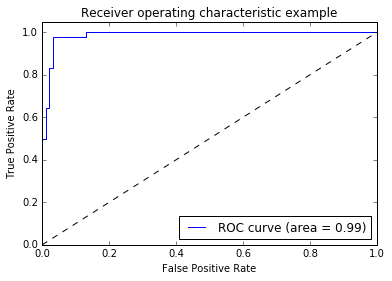

In [63]:
## for test dataset
fpr, tpr, thresholds = roc_curve(Y_SHtest, best_rfc.predict_proba(X_SHtest)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roct)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

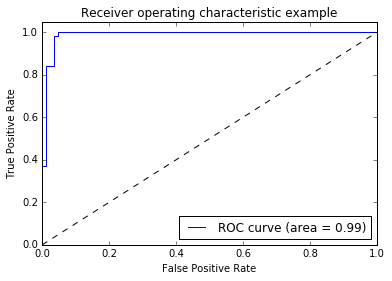

In [65]:
fprv, tprv, thresholdsv = roc_curve(Y_SHvalid, best_rfc.predict_proba(X_SHvalid)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fprv, tprv, label='ROC curve (area = %0.2f)' % rocv)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## --------------------K (10) fold cross validation----------------
<li> will use CVdata Data frame 

### K-Fold Cross Validation

1.  Split the data into K chunks
2.  Train K models, retain a chunk for testing and use the other K-1 chunks for training.
3.  The result is K scores, which can be combined into a single average score for the model

In [66]:
CVdata.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [67]:
# in this part will assign value of X and Y
Y_CVdata=CVdata.pop('Malignant')

In [68]:
X_CVdata=CVdata

In [69]:
CVdata.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [70]:
## Here we will apply cross validatio method
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, CVdata, Y_CVdata, cv=10)

In [73]:
scores

array([ 0.91549296,  0.98571429,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [74]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)

Score is 0.968651 +/-  0.019628


96 percent probability that if this experiment were repeated over and over the average score would be between 0.91549296 and 0.98571429

## -------------Will run Random forest on main data---------------------
<li> Will use original Dataset Rdata


In [76]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
Rdata = pd.read_csv("breast_cancer.csv")

In [78]:
Rdata.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [79]:
#Will remove not required columns such as 'Unnamed: 0' and 'id number' as we are predicting probabilty of cancer cell is malignant or not
Rdata = Rdata.drop(['Unnamed: 0', 'id number'], axis=1)

In [80]:
#In this section will check is there any missing values in each column 
#before checking missing values rename column names to precise name
Rdata.rename(columns={'clump_thickness':'Clmpthk'}, inplace=True)
Rdata.rename(columns={'uniformity_of_cell_size':'Ucelsz'}, inplace=True)
Rdata.rename(columns={'uniformity_of_cell_shape':'Ucelsp'}, inplace=True)
Rdata.rename(columns={'marginal_adhesion':'Mgradh'}, inplace=True)
Rdata.rename(columns={'epithelial_cell_size':'Ecelsz'}, inplace=True)
Rdata.rename(columns={'bare_nuclei':'Brnuc'}, inplace=True)
Rdata.rename(columns={'bland_chromatin':'Bldchr'}, inplace=True)
Rdata.rename(columns={'normal_nucleoli':'Nrmnuc'}, inplace=True)
Rdata.rename(columns={'mitoses':'Mit'}, inplace=True)
Rdata.rename(columns={'malignant':'Malignant'}, inplace=True)

In [81]:
Rdata.head()

,Clmpthk,Ucelsz,Ucelsp,Mgradh,Ecelsz,Brnuc,Bldchr,Nrmnuc,Mit,Malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [82]:
Ry = Rdata.pop("Malignant")

In [83]:
X_train, X_test, y_train, y_test = train_test_split(Rdata, Ry, test_size=.2, random_state=42)

In [84]:
### Grid Search
n_estimators = [100,300,400,500,1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [86]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [87]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## ---Accuracy

In [88]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.978571428571


In [89]:
y_hat = best_rfc.predict(X_test)

In [90]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [91]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: Malignant, dtype: int64

In [92]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.978571428571


In [93]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98        95
          1       0.96      0.98      0.97        45

avg / total       0.98      0.98      0.98       140



In [94]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 1 44]]


<li><strong>Precision: <strong>44/ 44 + 2 = .95
<li><strong>Recall: <strong> 44 / 44 + 1 = .97

In [95]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.997192982456


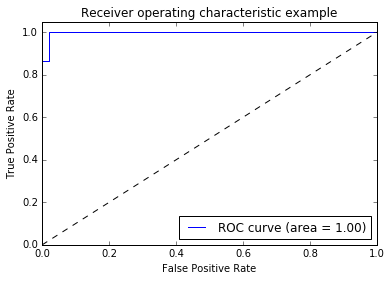

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ---Report on how the K-Fold CV score compared to your single holdout AUC-------

#### We will look into definitions 
<strong>K-Fold CV:</strong> Technique for assessing how the results of a Statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In this model tool split data in k part and keep on part as test dataset and train model on other datasets and it run K time until all part treated as test dataset:

<strong>Single Hold Out:</strong>
In this technique data will get split in three parts Train, validation, and Test datasets and accuracy of model get validated on new data from validation data set to avoid data exposer to algorithm. Data will split as 60% Train ,20% Test and 20% Validation


<li>Comparison of K-Fold CV and Single Hold Out

AUC score for K-Fold CV varies in between 95% to 97% and it stays 96%
While
AUC score for Single Hold Out 
for 20% test dataset is 97% and for 20% validation dataset is 95%

We can say that the accuracy of data will varies in between 95 to 97 %


## --Write a short description of your model's performance.   Include AUC, Accuracy, Precision, and Recall in your discussion----

## --Performance of our model using Breast cancer data:
<strong>Single out Hold:</strong>
In this method: Accuracy of our model predicting malignant cancer stays around 96 % having, Where AUC is around 98%, Precision is around 95% and Recall is 98%:

<strong>K-FoldCV:</strong>
In this method: Accuracy of our model predicting malignant cancer stays around 96 % having, Where AUC is around 96%,  Precision is around 96% and Recall is 98%:

<strong>Split percentage:</strong>
In this method: Accuracy of our model predicting malignant cancer stays around 97 % having, Where AUC is around 99%,  Precision is around 98% and Recall is 98%:


## ---------------------------End of Assignment-------------------------------